In [239]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from numpy.polynomial.polynomial import polyfit

In [3]:
NumD = ([7,5,5,13,4,2,3,3,13,4,23,59,9,84,5,103])
Year = ([1980,1981,1981,1983,1986,1989,1989,1989,1998,1999,2001,2005,2007,2008,2010,2017])

https://www.wpc.ncep.noaa.gov/research/txhur.pdf
https://en.wikipedia.org/wiki/List_of_Texas_hurricanes_(1980%E2%80%93present)

Text(0.5, 1.0, 'Known Deaths From Tropical Storms in Texas')

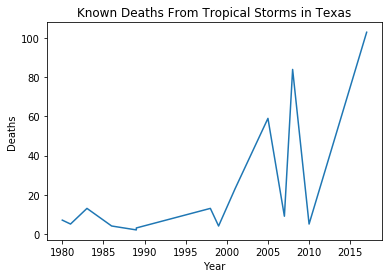

In [240]:
plt.plot(Year,NumD)
plt.ylabel('Deaths')
plt.xlabel('Year')
plt.title('Known Deaths From Tropical Storms in Texas')

In [269]:
data=pd.read_csv('Basin.NA.ibtracs_wmo.v03r10.csv')

In [270]:
storms = pd.DataFrame(data)

In [271]:
storms.tail()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO),Center,Wind(WMO) Percentile,Pres(WMO) Percentile,Track_type
49645,2016323N13279,2016,16,EP,MM,OTTO,2016-11-25 18:00:00,TS,10.0,-88.8,50.0,997.0,atcf,58.682,59.766,main
49646,2016323N13279,2016,16,EP,MM,OTTO,2016-11-26 00:00:00,TS,9.7,-90.2,45.0,1000.0,atcf,50.436,51.359,main
49647,2016323N13279,2016,16,EP,MM,OTTO,2016-11-26 06:00:00,TS,9.4,-91.7,40.0,1003.0,atcf,42.727,42.121,main
49648,2016323N13279,2016,16,EP,MM,OTTO,2016-11-26 12:00:00,TS,9.1,-93.3,30.0,1005.0,atcf,17.645,32.311,main
49649,2017323N13279,2017,1,NA,NA,HARVEY,2017-08-26 12:00:00,TS,29.1,-94.3,112.0,937.0,atcf,17.645,32.311,main


In [70]:
for col in storms.columns:
    print(col)


Serial_Num
Season
Num
Basin
Sub_basin
Name
ISO_time
Nature
Latitude
Longitude
Wind(WMO)
Pres(WMO)
Center
Wind(WMO) Percentile
Pres(WMO) Percentile
Track_type


In [272]:
stormslat = storms[(storms['Latitude'] >= 25.0) & (storms['Latitude'] <= 32.0)]

In [273]:
stormslong = stormslat[(stormslat['Longitude'] >= -98.0) & (stormslat['Longitude'] <= -90.0)]

The above cells narrows the geographic window to a portion of the gulf of Mexico with Houston in the top left corner. The cell below goes back to the entire dataset as a control/reference.

In [274]:
stormsNA = storms[(storms['Season'] >= 1900) & (storms['Wind(WMO)'] >= 64)]

The cell above selects storms past a certain year and wind measured to 64 knots, the metric used to define a category 1 storm/hurricane

In [275]:
stormsNA.shape

(10708, 16)

In [276]:
stormsNA1 = stormsNA.groupby(['Serial_Num']).max()

The cell above groups the data by Storm, and its max reported wind speed.

In [277]:
stormsNA1.shape

(654, 15)

Text(0.5, 1.0, 'Storm intensity over the N.Atlantic')

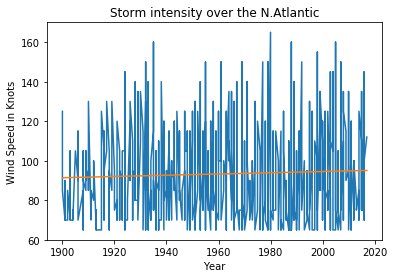

In [278]:
x = stormsNA1['Season']
y = stormsNA1['Wind(WMO)']
b, m = polyfit(x,y,1)
plt.plot(x,y)
plt.plot(x, b + m * x, '-')
plt.ylabel('Wind Speed in Knots')
plt.xlabel('Year')
plt.title('Storm intensity over the N.Atlantic')

The trend above indicates an increase in intensity of about 3.1% per year with n = 654

Text(0.5, 1.0, 'Frequency of Cat 1+ Storms in the N.Atlantic')

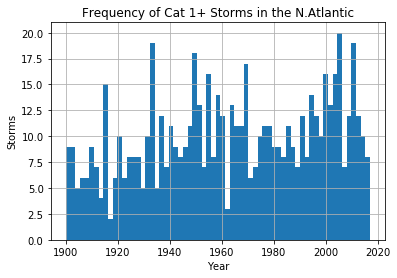

In [282]:
stormsNA1['Season'].hist(bins=65)
plt.ylabel('Storms')
plt.xlabel('Year')
plt.title('Frequency of Cat 1+ Storms in the N.Atlantic')


In [283]:
stormsGulf = stormslong[(stormslong['Season'] >= 1900) & (stormslong['Wind(WMO)'] >= 64)]

In [284]:
stormsGulf.shape

(400, 16)

In [285]:
stormsGulf1 = stormsGulf.groupby(['Serial_Num']).max()

In [286]:
stormsGulf1.shape

(76, 15)

Text(0.5, 1.0, 'Storm intensity over the Gulf & Texas')

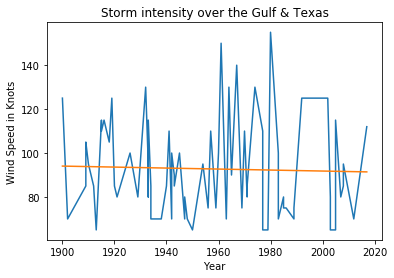

In [291]:
x = stormsGulf1['Season']
y = stormsGulf1['Wind(WMO)']
b, m = polyfit(x,y,1)
plt.plot(x,y)
plt.plot(x, b + m * x, '-')
plt.ylabel('Wind Speed in Knots')
plt.xlabel('Year')
plt.title('Storm intensity over the Gulf & Texas')

the trend above indicates a decrease in storm intensity by 2.2% per year with n = 76


Text(0.5, 1.0, 'Frequency of Cat 1+ Storms over the Gulf & Texas')

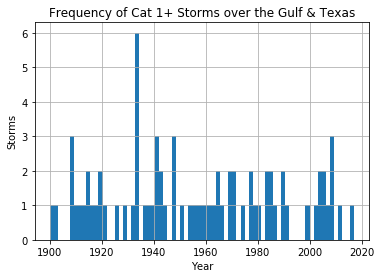

In [288]:
stormsGulf1['Season'].hist(bins=75)
plt.ylabel('Storms')
plt.xlabel('Year')
plt.title('Frequency of Cat 1+ Storms over the Gulf & Texas')

worldwide data displayed below for the curious

In [241]:
alldata=pd.read_csv('Allstorms.ibtracs_wmo.v03r10.csv')

In [242]:
allstorms = pd.DataFrame(alldata)

In [244]:
stormsglobal = allstorms[(allstorms['Season'] >= 1900) & (allstorms['Wind(WMO)'] >= 64)]

In [260]:
stormsglobaly = stormsglobal.groupby(['Serial_Num']).max()
stormsglobaly.shape

(2278, 15)

Text(0.5, 1.0, 'Storm Intensity Worldwide')

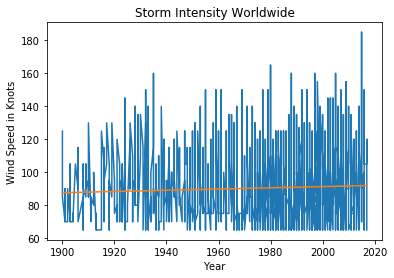

In [289]:
x = stormsglobaly['Season']
y = stormsglobaly['Wind(WMO)']
b, m = polyfit(x,y,1)
plt.plot(x,y)
plt.plot(x, b + m * x, '-')
plt.ylabel('Wind Speed in Knots')
plt.xlabel('Year')
plt.title('Storm Intensity Worldwide')

The trend above indicates an increase in intensity of 3.7% per year with n = 2276

Text(0.5, 1.0, 'Frequency of Cat 1+ Storms Worldwide')

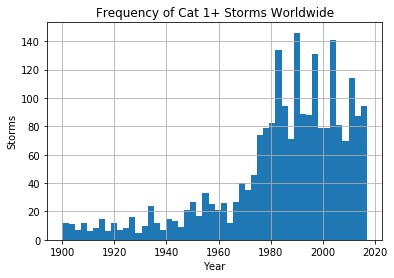

In [249]:
stormsglobaly['Season'].hist(bins=50)
plt.ylabel('Storms')
plt.xlabel('Year')
plt.title('Frequency of Cat 1+ Storms Worldwide')

There seems to be an a strong positive exponential trend. There could also be a large margin of error due to advances in weather tracking after the 60s